# Exploratory Data Analysis for a Retail Firm

## Task 4 - To Explore Business Analytics

### Objective:

<b>
Perform 'Exploratory Data Analysis' on the provided dataset "SampleSuperStore". Suppose,you are the buisness owner of retail firm and want to see how your company is performing.You are interested to find out the weak areas where you can work to make profit.What all buisness problems you can derive by looking into the data?</b>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df = pd.read_csv('dataset/SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Exploring the dataset 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

## Data Cleaning

In [6]:
df.duplicated().sum()

17

In [8]:
df.drop_duplicates(keep = 'first', inplace = True)

In [9]:
df.shape

(9977, 13)

In [10]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [328]:
df.drop(['Postal Code'], axis=1, inplace=True)

In [329]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


## Exploratory Data Analysis

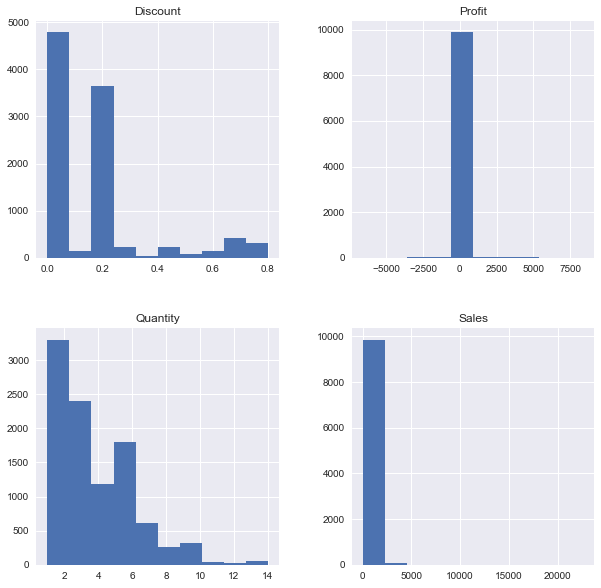

In [330]:
df.hist(figsize=(10,10));

In [331]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [332]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [333]:
df['Profit'].sum()

286241.4226

In [334]:
df['Sales'].sum()

2296195.5903

In [335]:
df_top_sales = df.groupby('State').Sales.sum().nlargest()
df_top_sales

State
California      457576.2715
New York        310827.1510
Texas           170124.5418
Washington      138560.8100
Pennsylvania    116496.3620
Name: Sales, dtype: float64

In [336]:
df_top_prof = df.groupby('State').Profit.sum().nlargest()
df_top_prof

State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Name: Profit, dtype: float64

### Top 5 States having maximum sales

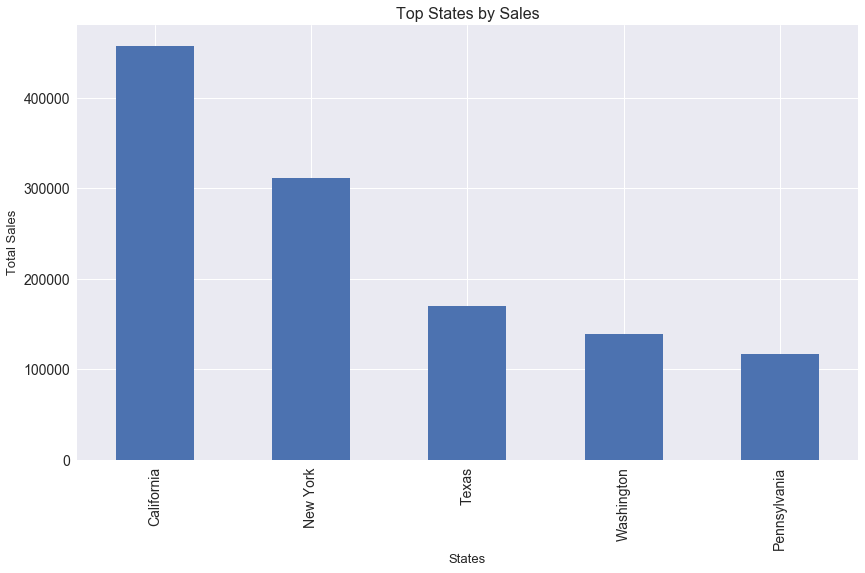

In [337]:
plt.style.use('seaborn')
df_top_sales.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top States by Sales",fontsize =16)
plt.show()

### Top 5 States having maximum Profit.

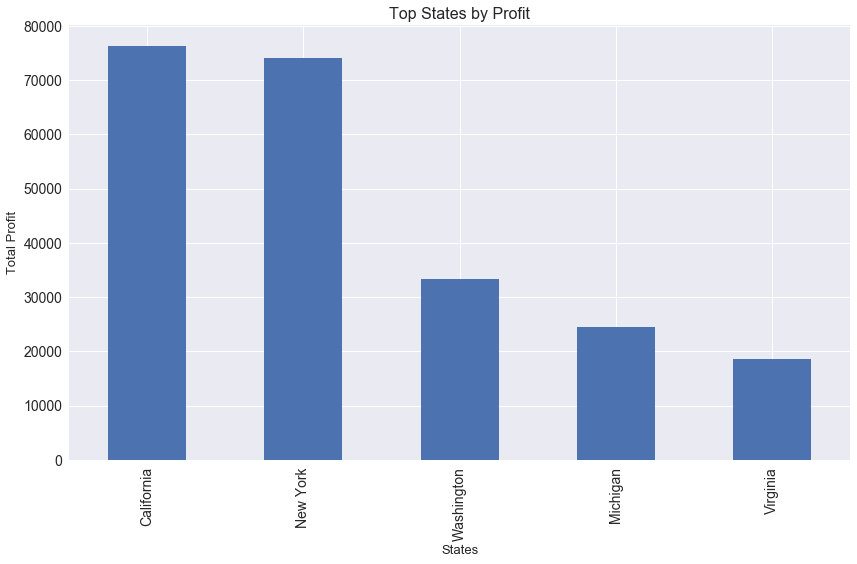

In [338]:
plt.style.use('seaborn')
df_top_prof.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Profit",fontsize =13)
plt.title("Top States by Profit",fontsize =16)
plt.show()

Visualizing which Category got maximum number of sales & Profit.

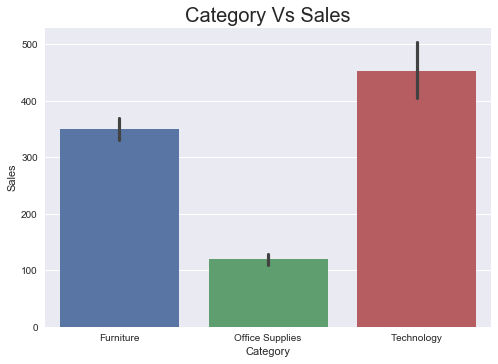

In [339]:
x=sns.barplot(data=df, x='Category' ,y='Sales').set_title('Category Vs Sales', size=20)

We can see that Technology items got the maximum number of sales while Office supplies and goods getting minimum ones.

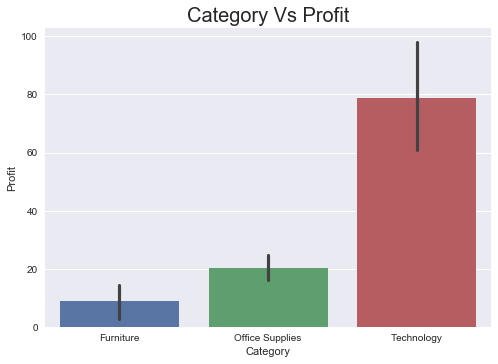

In [340]:
y=sns.barplot(data=df, x='Category', y='Profit').set_title('Category Vs Profit', size=20)

Having maximum sales of Technology items it is also the profitable one.

While Furniture items were least profitable.

In [341]:
sub_cat = df.groupby(['Category','Sub-Category'])[['Sales','Profit']].sum().reset_index()
sub_cat

,Category,Sub-Category,Sales,Profit
0,Furniture,Bookcases,114879.9963,-3472.5560
1,Furniture,Chairs,327777.7610,26567.1278
2,Furniture,Furnishings,91683.0240,13052.7230
3,Furniture,Tables,206965.5320,-17725.4811
4,Office Supplies,Appliances,107532.1610,18138.0054
5,Office Supplies,Art,27107.0320,6524.6118
6,Office Supplies,Binders,203409.1690,30228.0003
7,Office Supplies,Envelopes,16476.4020,6964.1767
8,Office Supplies,Fasteners,3024.2800,949.5182
9,Office Supplies,Labels,12444.9120,5526.3820


#### Top 5 Sub-Category items which were sold the most.

In [342]:
sub_catg_sales = df.groupby('Sub-Category').Sales.sum().nlargest()
sub_catg_sales

Sub-Category
Phones     330007.054
Chairs     327777.761
Storage    223843.608
Tables     206965.532
Binders    203409.169
Name: Sales, dtype: float64

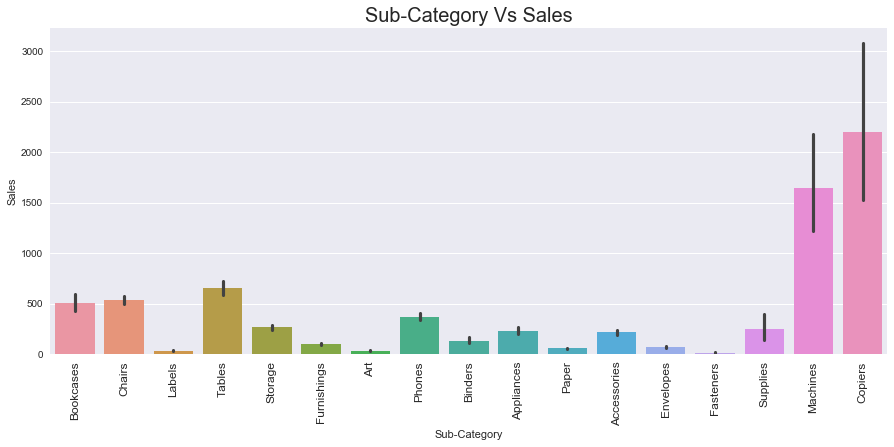

In [343]:
plt.figure(figsize=(15,6))
x=sns.barplot(data=df, x='Sub-Category', y='Sales').set_title('Sub-Category Vs Sales', size=20)
plt.xticks(rotation=90, size=12);

We can see that Copiers had the maximum sales while Fasteners having the least ones.

In [344]:
#Top 5 Profitable Sub-Category items.
sub_catg_prof = df.groupby('Sub-Category').Profit.sum().nlargest()
sub_catg_prof

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          33944.2395
Binders        30228.0003
Name: Profit, dtype: float64

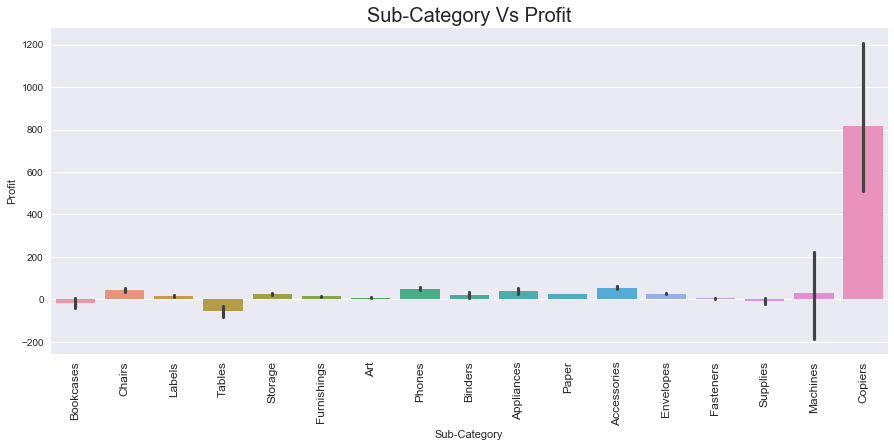

In [345]:
plt.figure(figsize=(15,6))
x=sns.barplot(data=df, x='Sub-Category', y='Profit').set_title('Sub-Category Vs Profit', size=20)
plt.xticks(rotation=90, size=12);

The most profitable Sub-category item is Copiers while Tables incurred the maximum loss.

#### Discount Vs Profit Regression Plot.

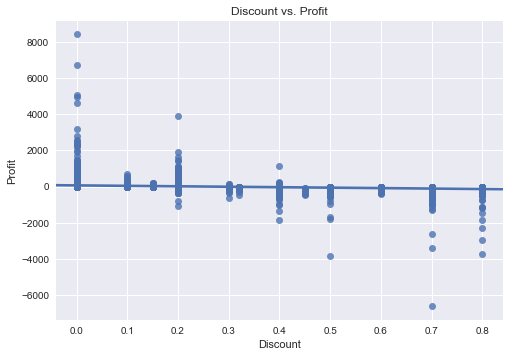

In [346]:
sns.regplot(df['Discount'], df['Profit'])
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show();

#### Discount Vs Sales Regression Plot.

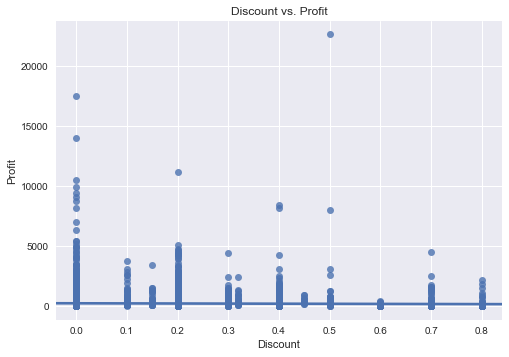

In [347]:
sns.regplot(df['Discount'], df['Sales'])
plt.title('Discount vs. Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show();

Let's see which Shipping mode was popular among the customers.

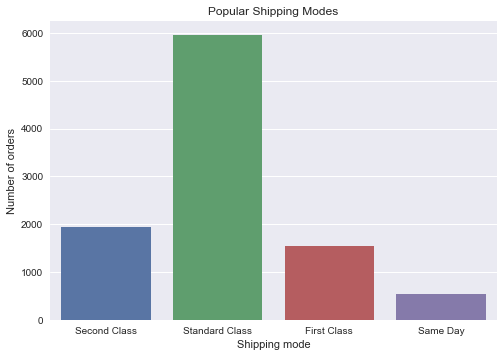

In [348]:
x = sns.countplot('Ship Mode', data=df)
plt.title('Popular Shipping Modes')
plt.xlabel('Shipping mode')
plt.ylabel('Number of orders')
plt.show()

Standard Class Shipping mode was the most preferrable mode while the Same Day shipping mode got the least orders.

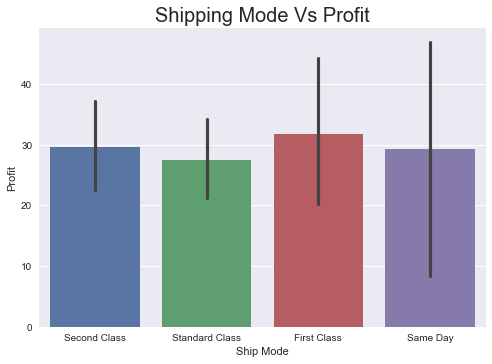

In [349]:
y=sns.barplot(data=df, x='Ship Mode', y='Profit').set_title('Shipping Mode Vs Profit', size=20)

Despite Standard Class being the most preferrable shipping mode, First Class earned the maximum Profit.

Let's see which Region got the maximum number of Sales and Profit.

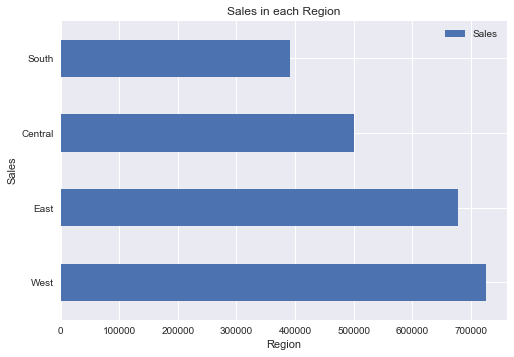

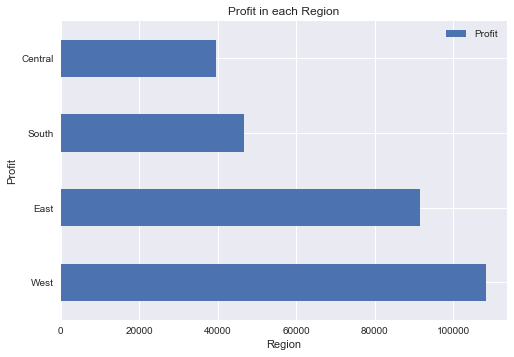

In [350]:
region_sale_profit = df.groupby('Region')[['Sales', 'Profit']].sum()

region_sale_profit.sort_values(['Sales'], axis = 0, ascending = False, inplace = True) 
region_sale_profit.plot(y='Sales', kind = "barh")

plt.title('Sales in each Region')
plt.xlabel('Region')
plt.ylabel('Sales');

region_sale_profit.sort_values(['Profit'], axis = 0, ascending = False, inplace = True) 
region_sale_profit.plot(y='Profit', kind = "barh")

plt.title('Profit in each Region')
plt.xlabel('Region')
plt.ylabel('Profit');

East & West Region both had the top Sales & Profit.

<b>Let's check the maximums and minimums of each varibale.</b>

In [351]:
#A common fucntion created to reduce the work of writing the code repeatedly. 
#The function will take any column as argument from which data is to be extracted and create the visualization.
def visualize(col1,col2,x):
    a = df.groupby(col1)[col2].sum().reset_index().sort_values(by=col2,ascending=False)
    top=a.head()
    bottom=a.tail()
    if x=='top':
        sns.barplot(col1,col2, data=top,  palette='rainbow')
    else:
        sns.barplot(col1,col2, data=bottom,  palette='rainbow')
            
    plt.title('{} Vs {}'.format(col2,col1),size=20)
    plt.xticks(rotation=90)
    plt.ylabel(col2)
    plt.xlabel(col1)
    return plt.show()
    
    
    

Cities registering maximum Profit.

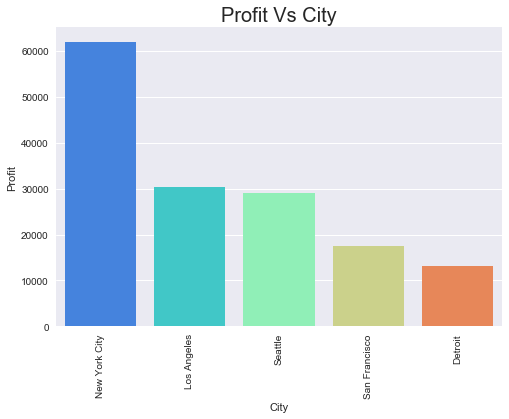

In [352]:
visualize('City', 'Profit','top')

Cities registering maximum Loss.

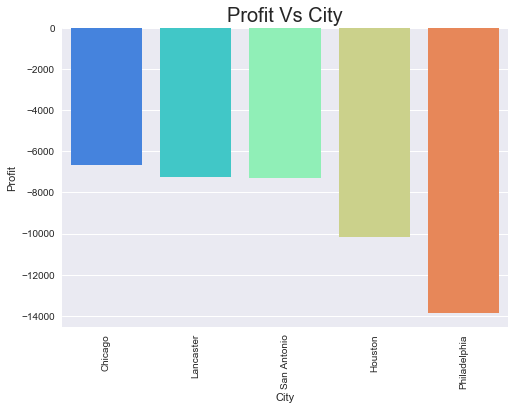

In [353]:
visualize('City', 'Profit','bottom')

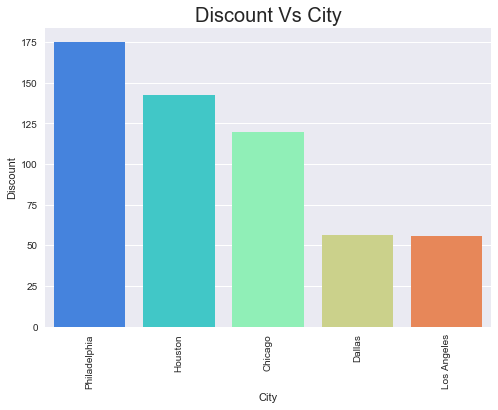

In [354]:
visualize('City','Discount','top')

States giving most number of discounts.

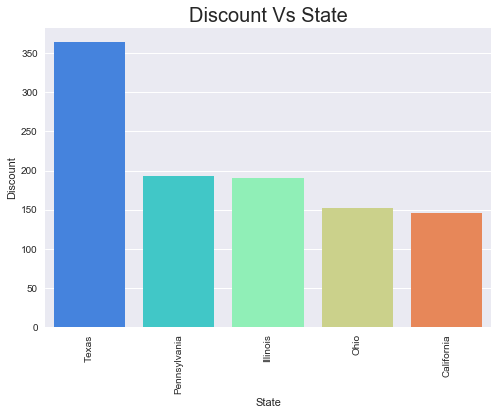

In [355]:
visualize('State','Discount','top')

Categories giving most number of discounts.

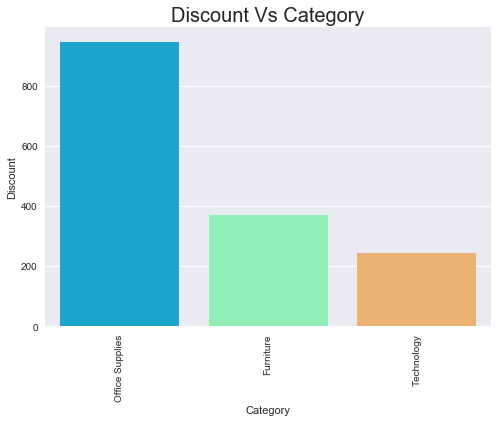

In [356]:
visualize('Category','Discount','top')

Shipping Modes giving most number of discounts.

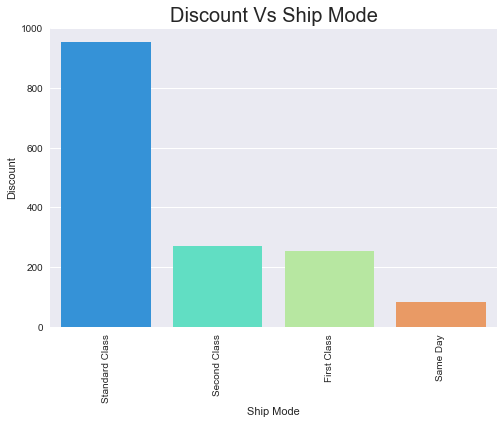

In [357]:
visualize('Ship Mode','Discount','top')

Top-5 Sub-Categories giving maximum profit.

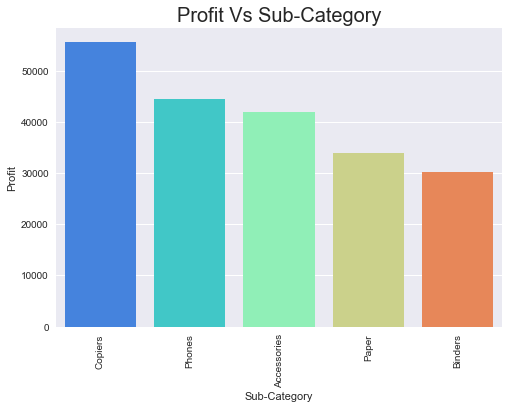

In [358]:
visualize('Sub-Category','Profit','top');


Top-5 Sub-Categories incurring maximum Loss.

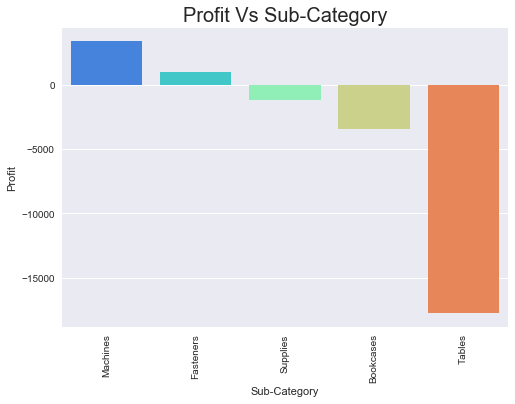

In [359]:
visualize('Sub-Category','Profit','bottom')

Top-5 Sub-Categories giving most number of discounts.

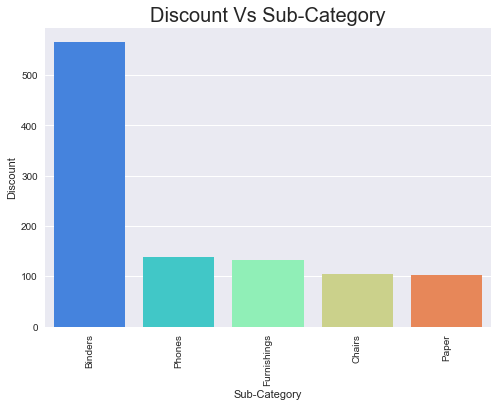

In [360]:
visualize('Sub-Category','Discount','top')

Top-5 Sub-Categories giving least number of discounts.

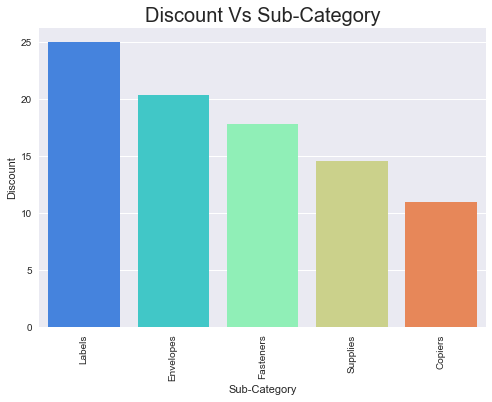

In [361]:
visualize('Sub-Category','Discount','bottom')

In [362]:
df['Profit'].mean()

28.69012955798349

The average profit of this company is 28.690

## Findings:

1. The Technology items got the maximum number of sells as well as it earned maximum profit than other categories.
2. The Consumer Segment is the most profitable and has the most number of buyers.
3. New York & California are the top states having the maximum sales and profit respectively.
4. Even though Tables got the most no. of sales i.e.206965.5320 eventhough it incurred a loss of -17725.4811.
5. It is evident that despite of giving discounts the company registerd minimum sales and maximum loss.
6. Standerd Class is the popular shipping mode among the consumers.
7. First Class is the profitable shipping mode.
8. Eastern & Western regions both registerd maximum Sales & Profit respectively.
9. Inspite of giving maximum number of discounts Philadelphia suffered the maximum number of loss.
10. Texas & Pennsylvania are among the top states giving maximum number of discounts.
11. Despite the fact that Copiers gave least dicount it gained the maximum profit.
12. The company generated average profit of 28.69, which is still a good sign for the company as it does not take any loss.

We can improve in that States By Providing Discounts in prefered Range so that Company and cosumer both will be in profit.
There are cases where company sold the most product but that product generated loss, even some product gave the maximum discount still failed to attract consumer group. While some products which didn't gave discounts at all registerd most number of sales as well as profits. So, according to findings it is clear that there is something wrong with the companies sales and discount strategy. So For Deciding that we have to do some Technical Analysis.